In [1]:
chord_mapping = {
    "A":     0,   "Am":     1,  "A5":      2,  "Amaj7":   3,  "Adim":    4,  "A7":      5,  "Am7":    6,  "Aaug":     7,  "A6":    8,  "A9":    9,  "Am6": 10,
    "A#":   11,   "A#m":   12,  "A#5":    13,  "A#maj7": 14,  "A#dim":  15,  "A#7":    16,  "A#m7":  17,  "A#aug":   18,  "A#6":  19,  "A#9":  20,  "A#m6": 21,
    "B":    22,   "Bm":    23,  "B5":     24,  "Bmaj7":  25,  "Bdim":   26,  "B7":     27,  "Bm7":   28,  "Baug":    29,  "B6":   30,  "B9":   31,  "Bm6": 32,
    "C":    33,   "Cm":    34,  "C5":     35,  "Cmaj7":  36,  "Cdim":   37,  "C7":     38,  "Cm7":   39,  "Caug":    40,  "C6":   41,  "C9":   42,  "Cm6": 43,
    "C#":   44,   "C#m":   45,  "C#5":    46,  "C#maj7": 47,  "C#dim":  48,  "C#7":    49,  "C#m7":  50,  "C#aug":   51,  "C#6":  52,  "C#9":  53,  "C#m6": 54,
    "D":    55,   "Dm":    56,  "D5":     57,  "Dmaj7":  58,  "Ddim":   59,  "D7":     60,  "Dm7":   61,  "Daug":    62,  "D6":   63,  "D9":   64,  "Dm6": 65,
    "D#":   66,   "D#m":   67,  "D#5":    68,  "D#maj7": 69,  "D#dim":  70,  "D#7":    71,  "D#m7":  72,  "D#aug":   73,  "D#6":  74,  "D#9":  75,  "D#m6": 76,
    "E":    77,   "Em":    78,  "E5":     79,  "Emaj7":  80,  "Edim":   81,  "E7":     82,  "Em7":   83,  "Eaug":    84,  "E6":   85,  "E9":   86,  "Em6": 87,
    "F":    88,   "Fm":    89,  "F5":     90,  "Fmaj7":  91,  "Fdim":   92,  "F7":     93,  "Fm7":   94,  "Faug":    95,  "F6":   96,  "F9":   97,  "Fm6": 98,
    "F#":   99,   "F#m":  100,  "F#5":   101,  "F#maj7":102,  "F#dim": 103,  "F#7":   104,  "F#m7": 105,  "F#aug":  106,  "F#6": 107,  "F#9": 108,  "F#m6": 109,
    "G":   110,   "Gm":   111,  "G5":    112,  "Gmaj7": 113,  "Gdim":  114,  "G7":    115,  "Gm7":  116,  "Gaug":   117,  "G6":  118,  "G9":  119,  "Gm6": 120,
    "G#":  121,   "G#m":  122,  "G#5":   123,  "G#maj7":124,  "G#dim":125,  "G#7":   126,  "G#m7":127,  "G#aug":  128,  "G#6":129,  "G#9":130,  "G#m6":131,
    "NC":  132,
    "Asus2":133, "A#sus2":134, "Bsus2":135, "Csus2":136, "C#sus2":137, "Dsus2":138, "D#sus2":139, "Esus2":140, "Fsus2":141, "F#sus2":142, "Gsus2":143, "G#sus2":144,
    "Am7b5":145, "A#m7b5":146, "Bm7b5":147, "Cm7b5":148, "C#m7b5":149, "Dm7b5":150, "D#m7b5":151, "Em7b5":152, "Fm7b5":153, "F#m7b5":154, "Gm7b5":155, "G#m7b5":156,
    "Asus4":157, "A#sus4":158, "Bsus4":159, "Csus4":160, "C#sus4":161, "Dsus4":162, "D#sus4":163, "Esus4":164, "Fsus4":165, "F#sus4":166, "Gsus4":167, "G#sus4":168,
    "Am9":169,   "A#m9":170,   "Bm9":171,   "Cm9":172,   "C#m9":173,   "Dm9":174,   "D#m9":175,   "Em9":176,   "Fm9":177,   "F#m9":178,   "Gm9":179,   "G#m9":180 
}

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PaperCNN(nn.Module):
    def __init__(self, num_classes, dropout_rate=0.25):
        super(PaperCNN, self).__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Dropout(p=dropout_rate),
            nn.MaxPool2d(kernel_size=(2, 1))
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.Dropout(p=dropout_rate),
            nn.MaxPool2d(kernel_size=(2, 1))
        )

        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # Reduced from (12, 9)
            nn.BatchNorm2d(128),
            nn.ReLU()
        )

        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Conv2d(128, 64, kernel_size=1),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Conv2d(64, num_classes, kernel_size=1),
            nn.Flatten()
        )

    def forward(self, x):
        x = self.block1(x)
        # print("After block1:", x.shape)
        x = self.block2(x)
        # print("After block2:", x.shape)
        x = self.block3(x)
        # print("After block3:", x.shape)
        x = self.classifier(x)
        # print("After classifier (flattened):", x.shape)
        return F.log_softmax(x, dim=1)

# Example
model = PaperCNN(num_classes=len(chord_mapping))
x_sample = torch.randn(12, 1, 105, 15)
out = model(x_sample)
print(out.shape)  # Should be [12, 181]


torch.Size([12, 181])


In [3]:
import sounddevice as sd
print(sd.query_devices())

   0 Asignador de sonido Microsoft - Input, MME (2 in, 0 out)
>  1 Analogue 1 + 2 (2- Focusrite US, MME (2 in, 0 out)
   2 Microphone Array (Intel® Smart , MME (4 in, 0 out)
   3 Asignador de sonido Microsoft - Output, MME (0 in, 2 out)
<  4 Altavoces (2- Focusrite USB Aud, MME (0 in, 2 out)
   5 Speakers (Realtek(R) Audio), MME (0 in, 8 out)
   6 27MP75 (HD Audio Driver for Dis, MME (0 in, 2 out)
   7 Controlador primario de captura de sonido, Windows DirectSound (2 in, 0 out)
   8 Analogue 1 + 2 (2- Focusrite USB Audio), Windows DirectSound (2 in, 0 out)
   9 Microphone Array (Intel® Smart Sound Technology for Digital Microphones), Windows DirectSound (4 in, 0 out)
  10 Controlador primario de sonido, Windows DirectSound (0 in, 2 out)
  11 Altavoces (2- Focusrite USB Audio), Windows DirectSound (0 in, 2 out)
  12 Speakers (Realtek(R) Audio), Windows DirectSound (0 in, 8 out)
  13 27MP75 (HD Audio Driver for Display Audio), Windows DirectSound (0 in, 2 out)
  14 Speakers (Realtek(R) A

Recording finished.


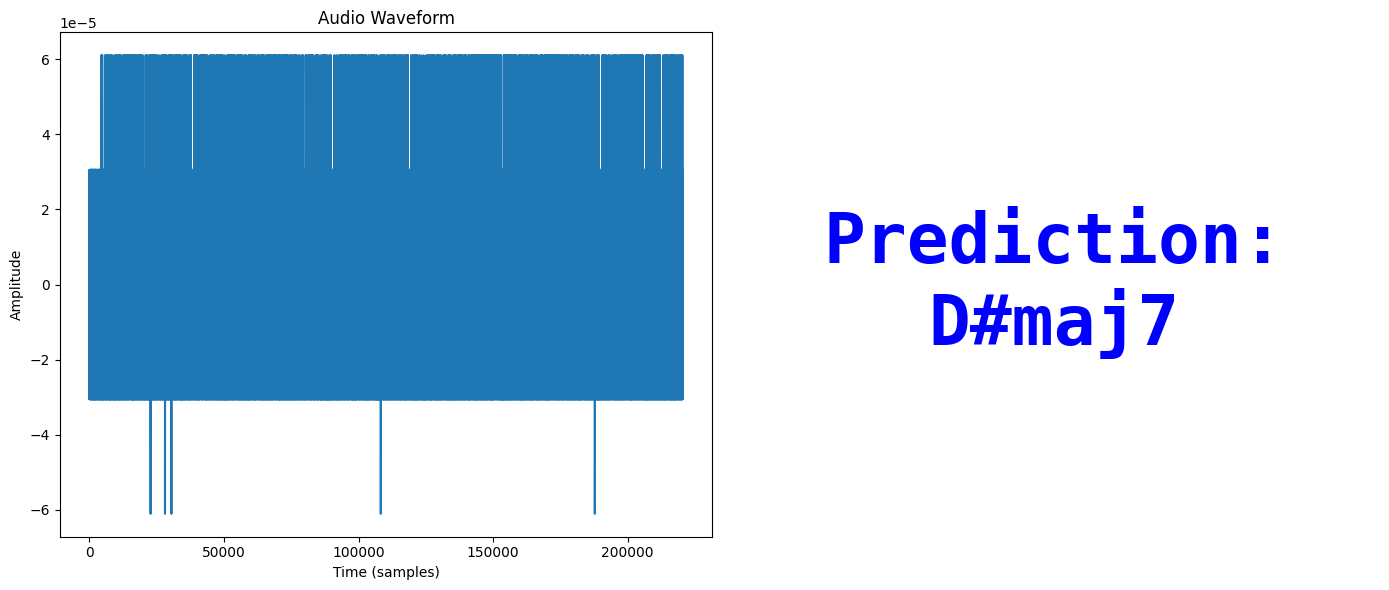

Audio saved to Guitar/NC_1746574924.wav


In [15]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import clear_output
import IPython.display as ipd
import librosa
import time as time
import os

# model = ChordClassifier(num_classes=len(chord_mapping))
model = PaperCNN(num_classes=len(chord_mapping))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
# model.load_state_dict(torch.load('papercnn2_colab_0605.pth', weights_only=True))
model.load_state_dict(torch.load('papercnn2_colab_0605.pth', map_location=device))

model.eval()

# Define the sample rate and duration of recording
sample_rate = 44100  # in Hz
duration = 5  # seconds

# Record audio from the microphone (Focusrite sound card)
print("Recording...")

device_index = 1  

# audio_data, sr = librosa.load('Guitar\Am_1746038061.wav', sr=None)

audio_data = sd.rec(int(sample_rate * duration),
                    samplerate=sample_rate,
                    channels=1,
                    dtype='float32',
                    device=device_index)

sd.wait()  # Wait for the recording to finish

clear_output(wait=True)
print("Recording finished.")

audio_data = audio_data.flatten()
# audio_data = audio_data/np.max(audio_data)

# chromagram = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
# torch_chroma = torch.tensor(np.array(chromagram), dtype=torch.float32)

C = librosa.vqt(audio_data, sr=sample_rate, hop_length=512, n_bins=84, bins_per_octave=12, gamma=0)
C = librosa.amplitude_to_db(abs(C))
torch_chroma = torch.tensor(np.array(C), dtype=torch.float32)

torch_chroma = torch_chroma.unsqueeze(0).unsqueeze(0)
torch_chroma = torch_chroma.to(device)

with torch.no_grad():
    output = model(torch_chroma)

    # print(output.shape)
    predicted_class = torch.argmax(output, dim=1).item()

label_mapping = {v: k for k, v in chord_mapping.items()}
predicted_label = label_mapping[predicted_class]

# Rseult Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(audio_data)
ax1.set_title('Audio Waveform')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Amplitude')

ax2.text(0.5, 0.5, f'Prediction:\n{predicted_label}',
         fontsize=50, ha='center', va='center',
         color='blue', fontweight='bold', family='monospace')
ax2.axis('off')  # Optional: hide axes in the text plot

plt.tight_layout()  # Adjust spacing
plt.show()

user_label = input("Enter chord label:")

# Save audio 
dataset_dir = 'Guitar/'
# os.makedirs(dataset_dir, exist_ok=True)

filename = f"{user_label}_{int(time.time())}.wav"
filepath = os.path.join(dataset_dir, filename)
sf.write(filepath, audio_data, sample_rate)

print(f"Audio saved to {filepath}")
ipd.Audio(audio_data, rate=sample_rate)